In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer


from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score

import xgboost

In [4]:
# Download latest version
path = '../dataset/jamb_exam_results.csv'

In [5]:
df = pd.read_csv(path)

In [14]:
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [17]:
df.columns = df.columns.str.lower()

### Data Processing

In [20]:
 
# remove the student_id column 
df.drop(columns='student_id', inplace=True)

# fill missing values with zeros
df.fillna(value=0, inplace=True)



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

### Feature Selection

In [39]:
# Split the dataset into training and testing sets
train, validate, test = np.split(df.sample(frac=1, random_state=1), indices_or_sections=[int(0.6*len(df)), int(0.8*len(df))])

c:\Users\ADMIN PC\Documents\Zoomcamp\ML engineering\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [40]:
train.shape, validate.shape, test.shape 

((3000, 16), (1000, 16), (1000, 16))

In [43]:
train.head()

,jamb_score,study_hours_per_week,attendance_rate,teacher_quality,distance_to_school,school_type,school_location,extra_tutorials,access_to_learning_materials,parent_involvement,it_knowledge,age,gender,socioeconomic_status,parent_education_level,assignments_completed
2764,125,17,99,4,10.3,Public,Urban,No,Yes,High,Medium,18,Female,Medium,Primary,1
4767,124,15,57,3,12.0,Public,Rural,Yes,Yes,Medium,High,16,Female,Low,Secondary,1
3814,240,27,94,3,16.5,Public,Rural,Yes,No,Low,Medium,20,Female,Low,0,2
3499,181,13,82,2,0.0,Private,Urban,Yes,Yes,Medium,Medium,19,Female,Low,Primary,3
2735,191,23,100,3,6.9,Public,Urban,Yes,Yes,Low,Low,22,Female,Medium,Secondary,2


In [44]:
# Seperate the features and target columns for training, validation and test dataset
target = 'jamb_score'
train_X = train.drop(target, axis=1)
train_y = train[target]

validate_x = validate.drop(target, axis=1)
validate_y = validate[target]

test_X = test.drop(target, axis=1)
test_y = test[target]

In [52]:
train_dict = train_X.to_dict(orient='records')
val_dict = validate_x.to_dict(orient='records')
test_dict = test_X.to_dict(orient='records')

In [54]:
# Vectorizer 
vectorizer = DictVectorizer(sparse=False)

X_train = vectorizer.fit_transform(train_dict)
X_val = vectorizer.transform(val_dict)
X_test = vectorizer.transform(test_dict)

In [55]:
# Fit and train a Decision tree model
tree = DecisionTreeRegressor(max_depth=1)

tree.fit(X_train, train_y)

DecisionTreeRegressor(max_depth=1)

In [66]:
tree.n_features_in_ 

29

In [72]:
vectorizer.get_feature_names_out()

array(['access_to_learning_materials=No',
       'access_to_learning_materials=Yes', 'age', 'assignments_completed',
       'attendance_rate', 'distance_to_school', 'extra_tutorials=No',
       'extra_tutorials=Yes', 'gender=Female', 'gender=Male',
       'it_knowledge=High', 'it_knowledge=Low', 'it_knowledge=Medium',
       'parent_education_level', 'parent_education_level=Primary',
       'parent_education_level=Secondary',
       'parent_education_level=Tertiary', 'parent_involvement=High',
       'parent_involvement=Low', 'parent_involvement=Medium',
       'school_location=Rural', 'school_location=Urban',
       'school_type=Private', 'school_type=Public',
       'socioeconomic_status=High', 'socioeconomic_status=Low',
       'socioeconomic_status=Medium', 'study_hours_per_week',
       'teacher_quality'], dtype=object)

### Question 1

What feature is used for splitting the data?



[]

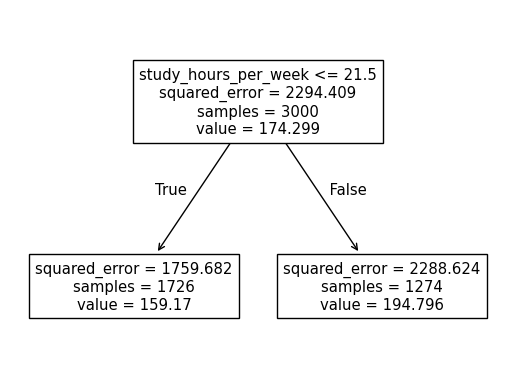

In [75]:
# Plot the decision tree 

plot_tree(tree, feature_names=vectorizer.get_feature_names_out(), filled=False, precision=3)
plt.plot()

In [85]:
pd.DataFrame(tree.feature_importances_, index=vectorizer.get_feature_names_out()).sort_values(by=0, ascending=False).head()

,0
study_hours_per_week,1.0
access_to_learning_materials=Yes,0.0
age,0.0
assignments_completed,0.0
access_to_learning_materials=No,0.0


From the decision tree plot and the feature_importance dataframe above, the feature used for splitting the data at each node is `study_hours_per_week`, hence this is the most important feature.

### Training a RandomForest model 

In [89]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

rf_model.fit(X_train, train_y)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

### Question 2

What is the RMSE of this model on the validation data?

In [93]:
# Get predictions for the validation data

y_val_pred = rf_model.predict(X_val)

# Calculate the RMSE of the validation data
val_RMSE = np.sqrt(mean_squared_error(validate_y, y_val_pred))

print(f'RMSE on the validation data: {round(val_RMSE, 2)}')

RMSE on the validation data: 40.88


### Question 3

Now let's experiment with the `n_estimators` parameter

Try different values of this parameter from 10 to 200 with step 10.
Set `random_state` to 1.
Evaluate the model on the validation dataset.
After which value of `n_estimators` does RMSE stop improving?

In [100]:
# Find the the provided range of values of `n_estimators`

for n_estimator in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n_estimator, random_state=1, n_jobs=-1)
    rf.fit(X_train, train_y)

    # Make predictions  
    val_pred = rf.predict(X_val)

    # Calculate RMSE on validation set
    val_rmse = round(np.sqrt(mean_squared_error(validate_y, val_pred)), 3)
    print(f'RMSE for {n_estimator} = {val_rmse}')

RMSE for 10 = 40.878
RMSE for 20 = 40.07
RMSE for 30 = 39.888
RMSE for 40 = 39.736
RMSE for 50 = 39.634
RMSE for 60 = 39.51
RMSE for 70 = 39.402
RMSE for 80 = 39.344
RMSE for 90 = 39.325
RMSE for 100 = 39.324
RMSE for 110 = 39.351
RMSE for 120 = 39.369
RMSE for 130 = 39.313
RMSE for 140 = 39.316
RMSE for 150 = 39.284
RMSE for 160 = 39.315
RMSE for 170 = 39.29
RMSE for 180 = 39.289
RMSE for 190 = 39.289
RMSE for 200 = 39.275


From the RMSE values for the different numbers of estimators, it is evident that after the RMSE when `n_estimators` is 80, there is little to no improvement in the RMSE value.

### Question 4

Let's select the best `max_depth`:

- Try different values of `max_depth`: [10, 15, 20, 25]
- For each of these values,
- - try different values of `n_estimators` from 10 till 200 (with step 10)
- - calculate the mean RMSE

- Fix the random seed: `random_state`=1.

What's the best `max_depth`, using the mean RMSE?


In [113]:
max_depths = [10, 15, 20, 25]

rmse_values = list()
param_dict = dict()
for max_depth in max_depths:
    rmse_for_each_max_depth = []
    for n_estimator in range(10, 201, 10):
        
        rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth, random_state=1, n_jobs=-1)
        rf.fit(X_train, train_y)

        # Calculate the RMSE
        val_pred = rf.predict(X_val)
        val_rmse = np.sqrt(mean_squared_error(validate_y, val_pred)).round(3)
        rmse_for_each_max_depth.append(val_rmse)

        rmse_values.append(val_rmse)
        

        # print(f'For max_depth: {max_depth}, the RMSE = {val_rmse}')
    param_dict[f'max_depth: {max_depth}'] = round(np.mean(rmse_for_each_max_depth), 3)



In [114]:
param_dict

{'max_depth: 10': np.float64(39.294),
 'max_depth: 15': np.float64(39.577),
 'max_depth: 20': np.float64(39.577),
 'max_depth: 25': np.float64(39.513)}

From the dictionary above that contains the `max_depth` and the average rmse for all the iterations of the model with the different `n_estimators`.


The best `max_depth` is the one with the lowest average rmse, which is 10.

### Question 5

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

Find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)

Get the feature importance information from this model

What's the most important feature?

In [124]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)

rf.fit(X_train, train_y)

# Get the feature importance
importance = rf.feature_importances_
features = vectorizer.get_feature_names_out()

feature_imp = pd.DataFrame(data=importance, index=features, columns=['importance'])
feature_imp.sort_values('importance', ascending=False).head()

,importance
study_hours_per_week,0.255765
attendance_rate,0.150596
distance_to_school,0.137448
teacher_quality,0.079885
age,0.057905


The most important feature here is `study_hours_per_week` 

### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

In [136]:
# Data preparation
for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = train[col].astype('category')
for col in validate.columns:
    if validate[col].dtype == 'object':
        validate[col] = validate[col].astype('category')
        
# Create DMatrix for train and validation
dmatrix_train = xgboost.DMatrix(X_train, label=train_y, enable_categorical=True)
dmatrix_val = xgboost.DMatrix(X_val, label=validate_y, enable_categorical=True)

# Creat Watchlist to validate performance
watchlist = [(dmatrix_train, 'train'), (dmatrix_val, 'validate')]

# Train the XGboost model 
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

boost = xgboost.train(params=xgb_params, dtrain=dmatrix_train, num_boost_round=100)

# Predict on the validation data and generate the RMSE 
y_pred = boost.predict(dmatrix_val)
RMSE_boost = np.sqrt(mean_squared_error(validate_y, y_pred))
print(f"The RMSE of the boosting model with eta= 0.3 is: {round(RMSE_boost,3)}")

The RMSE of the boosting model with eta= 0.3 is: 42.94


In [137]:
# Training for a new `eta` value:

new_xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

new_boost = xgboost.train(params=new_xgb_params, dtrain=dmatrix_train, num_boost_round=100)

# Predict on the validation data and generate the RMSE 
new_y_pred = new_boost.predict(dmatrix_val)
new_RMSE_boost = np.sqrt(mean_squared_error(validate_y, new_y_pred))
print(f"The RMSE of the boosting model with eta= 0.1 is: {round(new_RMSE_boost,3)}")

The RMSE of the boosting model with eta= 0.1 is: 40.202


From the two iterations of xgboost models with the differnece in `eta`, the best RMSE is gotten when the `eta` equals 0.1